The Enhanced Natural Terrain Landslide Inventory(ENTLI is a historical record of more than 100 000 observations and 14 features that has data from 1924 to 2019 of aerial photographs taken of hillsides and slopes. It includes locations of indentified landslides in latitudes and longitudes as well as other associated data for each landslide.
   - `slide_type:` classification of landslide
   - `m_width:` width of landslide main scarp(metres)
   - `s_length:` length of landslide source area(metres)
   - `slope:` ground slope angle across the landslide head
   - `cover:` vegetation cover within the landslide source
   - `year_1:` year of the aerial photograph on which the landside first observed.
   - `headelev:` elevation of landslide crown in mPD
   - `tailelev:` elevation of landslide toe in mPD.
   - `ele_diff:` elevation difference between landslide crown and toe in metre.
   - `gully:` "Y" when landslide is within a previously recorded area of gully erosion and "N" for when landslide is located outside of such areas
   - `class:` classification of relict landslide
   - `ENTLI_NO:` ENTLI number
   - `northing:` latitude coordinates
   - `easting:` longitude coordinates
   
Hong Kong district boundaries - https://data.gov.hk/en-data/dataset/hk-had-json1-hong-kong-administrative-boundaries

## Preliminary Wrangling

In [1]:
#import all packages
import geopandas as gpd
import fiona
from shapely.geometry import shape, LineString, Polygon

import pandas as pd
import matplotlib.pyplot as plt

#import folium

%matplotlib inline

In [2]:
print(gpd.__version__)
dir(gpd)

0.6.1


['GeoDataFrame',
 'GeoSeries',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_compat',
 '_config',
 '_version',
 'array',
 'base',
 'datasets',
 'geodataframe',
 'geopandas',
 'geoseries',
 'gpd',
 'io',
 'np',
 'options',
 'overlay',
 'pd',
 'plotting',
 'points_from_xy',
 'read_file',
 'read_postgis',
 'show_versions',
 'sjoin',
 'tools']

In [3]:
#geopandas available datasets
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [4]:
#read the file into a geodataframe
landslide_data = gpd.read_file('ENTLI_Up_to_Year_2019.gdb')

In [5]:
#View the first five rows of the data
landslide_data.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,ENTLI_NO,EASTING,NORTHING,geometry
0,R,10.5,16.0,44.0,C,1964,136.0,127.0,9.0,N,A2,02NED0001E,829062.359007,842154.704576,POINT (829062.359 842154.705)
1,R,11.5,14.0,29.0,C,1964,122.0,113.0,9.0,N,C1,02NED0002E,829176.865680,842509.807641,POINT (829176.866 842509.808)
2,R,10.0,16.0,22.0,C,1964,48.0,39.0,9.0,N,A2,02NED0003E,827401.227700,842230.475928,POINT (827401.228 842230.476)
3,R,11.0,22.5,22.0,C,1964,53.0,42.0,11.0,N,C1,02NED0004E,827407.309973,842208.930039,POINT (827407.310 842208.930)
4,R,12.5,14.0,43.0,C,1964,97.0,87.0,10.0,N,B1,02NED0005E,827526.113452,842190.282812,POINT (827526.113 842190.283)


In [6]:
print(type(landslide_data))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [7]:
#check original projection
print(landslide_data['geometry'].crs is None)
j = landslide_data['geometry'].crs
j

False


{'init': 'epsg:2326'}

The crs is a Mercator .This projection preserves angles (making it useful for sea navigation) and slightly distorts area.

In [8]:
landslide_data.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,ENTLI_NO,EASTING,NORTHING,geometry
0,R,10.5,16.0,44.0,C,1964,136.0,127.0,9.0,N,A2,02NED0001E,829062.359007,842154.704576,POINT (829062.359 842154.705)
1,R,11.5,14.0,29.0,C,1964,122.0,113.0,9.0,N,C1,02NED0002E,829176.865680,842509.807641,POINT (829176.866 842509.808)
2,R,10.0,16.0,22.0,C,1964,48.0,39.0,9.0,N,A2,02NED0003E,827401.227700,842230.475928,POINT (827401.228 842230.476)
3,R,11.0,22.5,22.0,C,1964,53.0,42.0,11.0,N,C1,02NED0004E,827407.309973,842208.930039,POINT (827407.310 842208.930)
4,R,12.5,14.0,43.0,C,1964,97.0,87.0,10.0,N,B1,02NED0005E,827526.113452,842190.282812,POINT (827526.113 842190.283)


In [9]:
#geometry types in the dataset
print(landslide_data.geom_type.unique())

['Point']


The geometry entries are made up of points

__Convert Mercator projection to the standard coordinate system for earth - EPSG 4326__

In [10]:
#convert from 2326 to 4326, CONVERT EASTING,NORTHING coordinates to lat,long coordinates. 
#4326 corresponds to coordinates in latitude and longitude
landslide_4326 = landslide_data.to_crs(epsg = 4326)

In [11]:
landslide_4326.head()

,SLIDE_TYPE,M_WIDTH,S_LENGTH,SLOPE,COVER,YEAR_1,HEADELEV,TAILELEV,ELE_DIFF,GULLY,CLASS,ENTLI_NO,EASTING,NORTHING,geometry
0,R,10.5,16.0,44.0,C,1964,136.0,127.0,9.0,N,A2,02NED0001E,829062.359007,842154.704576,POINT (114.10684 22.51906)
1,R,11.5,14.0,29.0,C,1964,122.0,113.0,9.0,N,C1,02NED0002E,829176.865680,842509.807641,POINT (114.10795 22.52226)
2,R,10.0,16.0,22.0,C,1964,48.0,39.0,9.0,N,A2,02NED0003E,827401.227700,842230.475928,POINT (114.09069 22.51973)
3,R,11.0,22.5,22.0,C,1964,53.0,42.0,11.0,N,C1,02NED0004E,827407.309973,842208.930039,POINT (114.09075 22.51954)
4,R,12.5,14.0,43.0,C,1964,97.0,87.0,10.0,N,B1,02NED0005E,827526.113452,842190.282812,POINT (114.09190 22.51937)


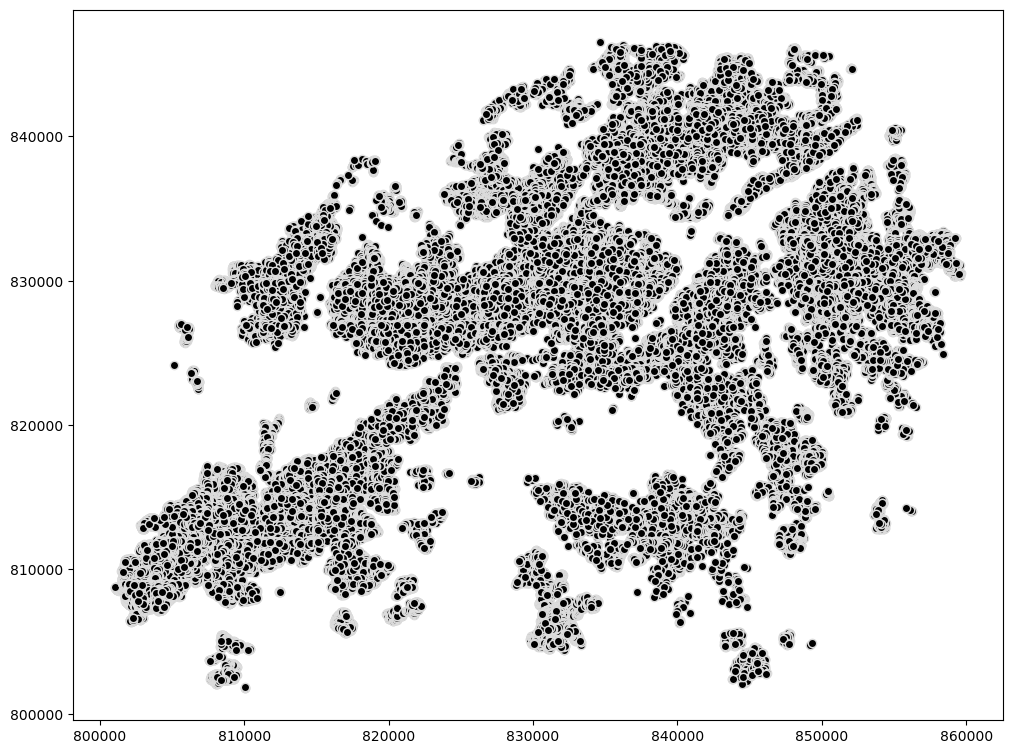

In [12]:
#visualize the data with plot()
landslide_data.plot(figsize=[12, 10], color='black', edgecolor = 'gainsboro')

plt.show()

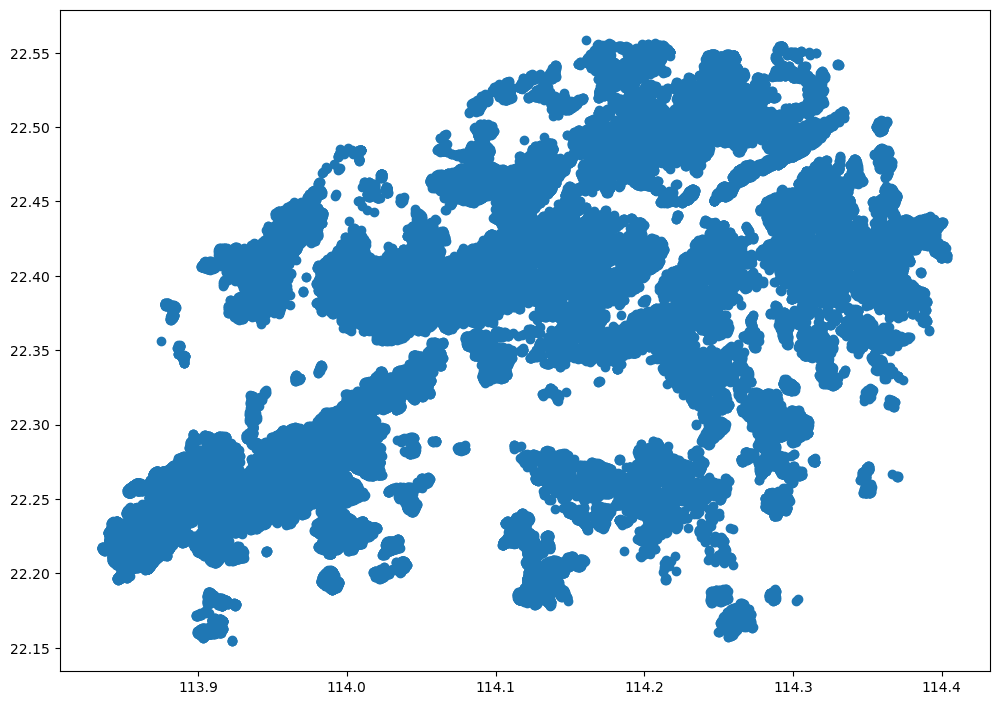

In [13]:
#visualize the data with plot()
landslide_4326.plot(figsize=[12, 10])

plt.show()

In [14]:
# Define a base map with county boundaries
world_filepath = gpd.datasets.get_path('naturalearth_cities')
world = gpd.read_file(world_filepath)
world.head(10)

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
5,Majuro,POINT (171.38000 7.10300)
6,Funafuti,POINT (179.21665 -8.51665)
7,Melekeok,POINT (134.62655 7.48740)
8,Monaco,POINT (7.40691 43.73965)
9,Tarawa,POINT (173.01757 1.33819)


In [15]:
#read district data into a geodataframe
districts = gpd.read_file('hksar_18_district_boundary.json')
districts

,地區號碼,District,地區,Administrative District Boundary of Hong Kong,geometry
0,A,Central & Western,中西區,Administrative District Boundary of Hong Kong,"POLYGON ((114.14951 22.29748, 114.10987 22.297..."
1,B,Wan Chai,灣仔,Administrative District Boundary of Hong Kong,"POLYGON ((114.19771 22.25790, 114.19778 22.258..."
2,C,Eastern,東區,Administrative District Boundary of Hong Kong,"POLYGON ((114.21939 22.29568, 114.21087 22.300..."
3,D,Southern,南區,Administrative District Boundary of Hong Kong,"POLYGON ((114.16338 22.25882, 114.16305 22.258..."
4,E,Yau Tsim Mong,油尖旺,Administrative District Boundary of Hong Kong,"POLYGON ((114.17448 22.32665, 114.17417 22.326..."
5,F,Sham Shui Po,深水埗,Administrative District Boundary of Hong Kong,"POLYGON ((114.17273 22.34646, 114.17258 22.346..."
6,G,Kowloon City,九龍城,Administrative District Boundary of Hong Kong,"POLYGON ((114.17946 22.34902, 114.17900 22.349..."
7,H,Wong Tai Sin,黃大仙,Administrative District Boundary of Hong Kong,"POLYGON ((114.22403 22.33452, 114.22112 22.353..."
8,J,Kwun Tong,觀塘,Administrative District Boundary of Hong Kong,"POLYGON ((114.22403 22.33452, 114.22397 22.334..."
9,K,Tsuen Wan,荃灣,Administrative District Boundary of Hong Kong,"POLYGON ((114.16919 22.41293, 114.16148 22.413..."


In [16]:
hong_kong = world.loc[world['name'].isin(['Kowloon'])]

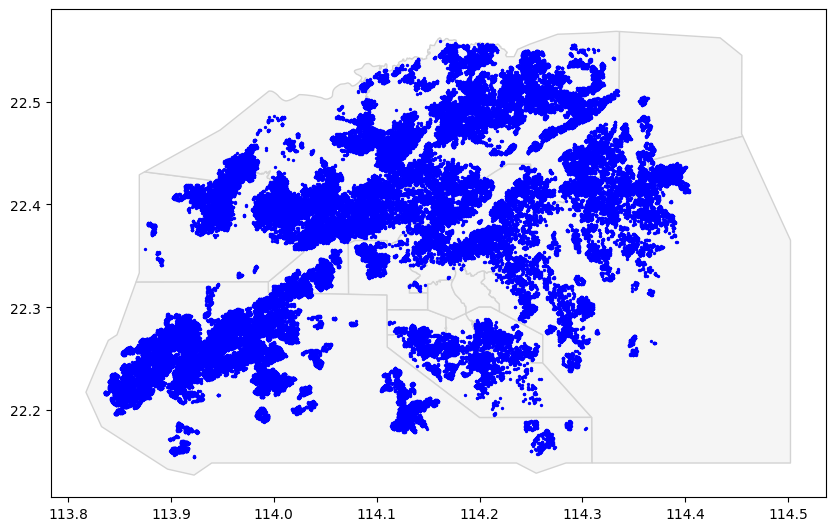

In [17]:
#visualize the data with plot(). RESEARCH Q1
ax = districts.plot(figsize=[10, 10], color = 'whitesmoke', edgecolor = 'lightgray')
# Add hong kong land slides
landslide_4326.plot(color='blue',markersize = 2, ax=ax)

plt.show()

#### Which district has the least landslides?
- there are 2 regions in the middle with no landslide data
    - ?

In [18]:
# % area of Hong Kong with landslides
# Hong Kong districts:total area in km^2
total_area = sum(districts.geometry.to_crs(epsg=3035).area) / 10**6
total_area

2753.4468156326006

In [19]:
#landslides area. Area = width * length in km^2
landslide_area = sum(landslide_4326.M_WIDTH * landslide_4326.S_LENGTH)/10**6
landslide_area

14.426813430001516

In [20]:
# % area
print('Approximately {}% of Hong Kong had landslides.'.format(round((landslide_area/total_area)*100, 2)))

Approximately 0.52% of Hong Kong had landslides.


In [21]:
# Select landslide areas in 2019
#landslide_2019 = geometry_4326.loc[geometry_4326.YEAR_1.isin(['2018', '2019'])].copy()
#landslide_2019.shape

In [22]:
#landslide_2019_b = landslide_2019.geometry.boundary

#visualize the 2018, 2019 data with plot()
landslide_2019_b.plot(figsize=[10, 10],markersize=5, color = 'blue')

plt.show()

In [23]:
#convert file to csv to use in PowerBi or Google Studio
#landslide_4326.to_csv('landslide_3.csv', index = False)

In [24]:
#landslide_4326.to_file('landslide2.geojson', driver="GeoJSON")

In [25]:
# dataset information
landslide_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 111408 entries, 0 to 111407
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   SLIDE_TYPE  111408 non-null  object  
 1   M_WIDTH     111408 non-null  float64 
 2   S_LENGTH    111408 non-null  float64 
 3   SLOPE       111408 non-null  float64 
 4   COVER       111408 non-null  object  
 5   YEAR_1      111408 non-null  object  
 6   HEADELEV    111408 non-null  float64 
 7   TAILELEV    111408 non-null  float64 
 8   ELE_DIFF    111408 non-null  float64 
 9   GULLY       111408 non-null  object  
 10  CLASS       111408 non-null  object  
 11  ENTLI_NO    111408 non-null  object  
 12  EASTING     111408 non-null  float64 
 13  NORTHING    111408 non-null  float64 
 14  geometry    111408 non-null  geometry
dtypes: float64(8), geometry(1), object(6)
memory usage: 12.7+ MB


In [26]:
landslide_data.isnull().sum()

SLIDE_TYPE    0
M_WIDTH       0
S_LENGTH      0
SLOPE         0
COVER         0
YEAR_1        0
HEADELEV      0
TAILELEV      0
ELE_DIFF      0
GULLY         0
CLASS         0
ENTLI_NO      0
EASTING       0
NORTHING      0
geometry      0
dtype: int64

#### Missing values
- There are missing values stored as '-'or 9999. These are landslide crowns or trails that are in subsequent development.

In [27]:
landslide_data.nunique()

SLIDE_TYPE         5
M_WIDTH          161
S_LENGTH         231
SLOPE            258
COVER              6
YEAR_1            63
HEADELEV         996
TAILELEV         980
ELE_DIFF         381
GULLY              2
CLASS              8
ENTLI_NO      111406
EASTING       109585
NORTHING      108849
geometry      111369
dtype: int64

In [28]:
landslide_data.duplicated().sum()

0

In [29]:
landslide_data.CLASS.unique()

array(['A2', 'C1', 'B1', 'C2', 'B2', '-', 'A1', 'S'], dtype=object)

###### Landslide classification
__scarp meaning: (escarpment): a very steep slope__
- A1: Debris relating to source evident (80% certain)
- A2: Scarp predominantly sharp (80% certain)
- B1: Scarp predominantly rounded (50% certain)
- B2: Rock scarp beyond which scarp predominantly rounded (50% certain)
- C1: Depression related to drainage line (10% certain)
- C2: road depression (10% certain)
- S: Coastal landslid

In [30]:
landslide_data.SLIDE_TYPE.unique()

array(['R', 'C', 'O', 'S', ' S'], dtype=object)

- R: relict landslide
- C: recent channelized debris flow
- O: recent open hillslope landslide
- S: recent coastal landslide

In [31]:
landslide_data.COVER.unique()

array(['C', 'A', 'B', 'D', ' B', ' A'], dtype=object)

- A: Totally bare of vegetation
- B: Partially bare of vegetation
- C: Completely covered by grass
- D: Covered in shrubs and/or trees

In [32]:
landslide_data.GULLY.unique()

array(['N', 'Y'], dtype=object)

__Area of gully have an invalid value__
- N prefixed with a space

__Is the data tidy?__
- The column names are in upper case. TO DO: Convert headings to lower case

In [33]:
#landslide_geojson = landslide_data

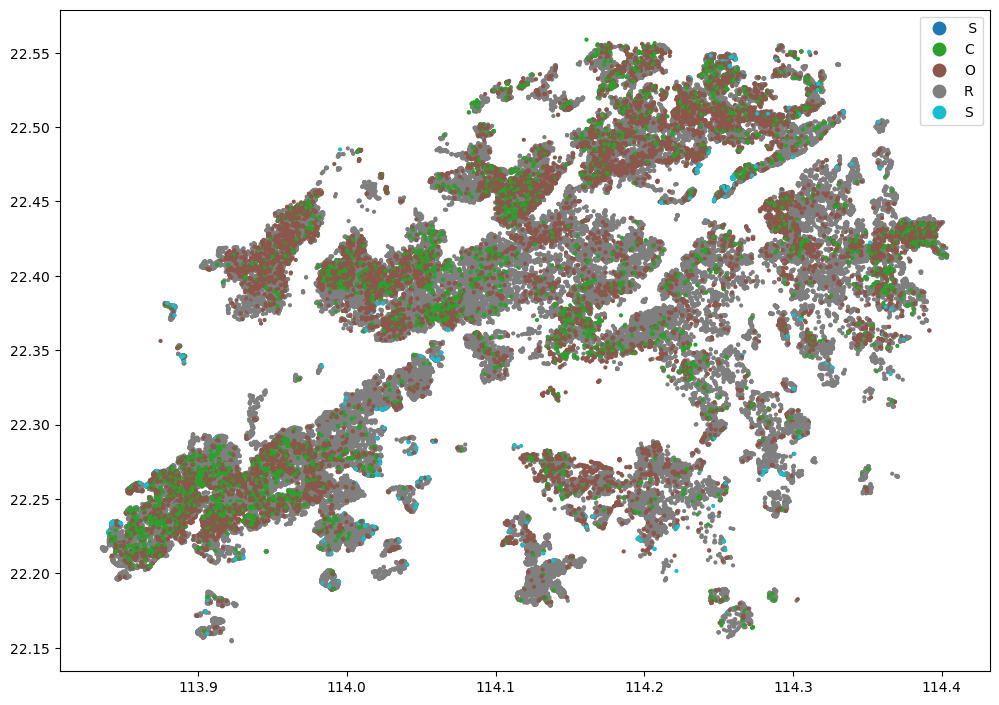

In [36]:
#density of landslides by slide type
ax = landslide_4326.plot('SLIDE_TYPE', figsize=[12,12], markersize = 4, legend = True)

plt.show()

- There are a few coastal landlides observed
- There is less recent channelized debris flow landlides (C) and recent open hillslope landslide (O) in the south eastern area as compared to the rest of the area.
- Through map observation, the most common types are relict landslides (R) followed by hillslope landslides (O) and then by channelized debris flow landlides (C)

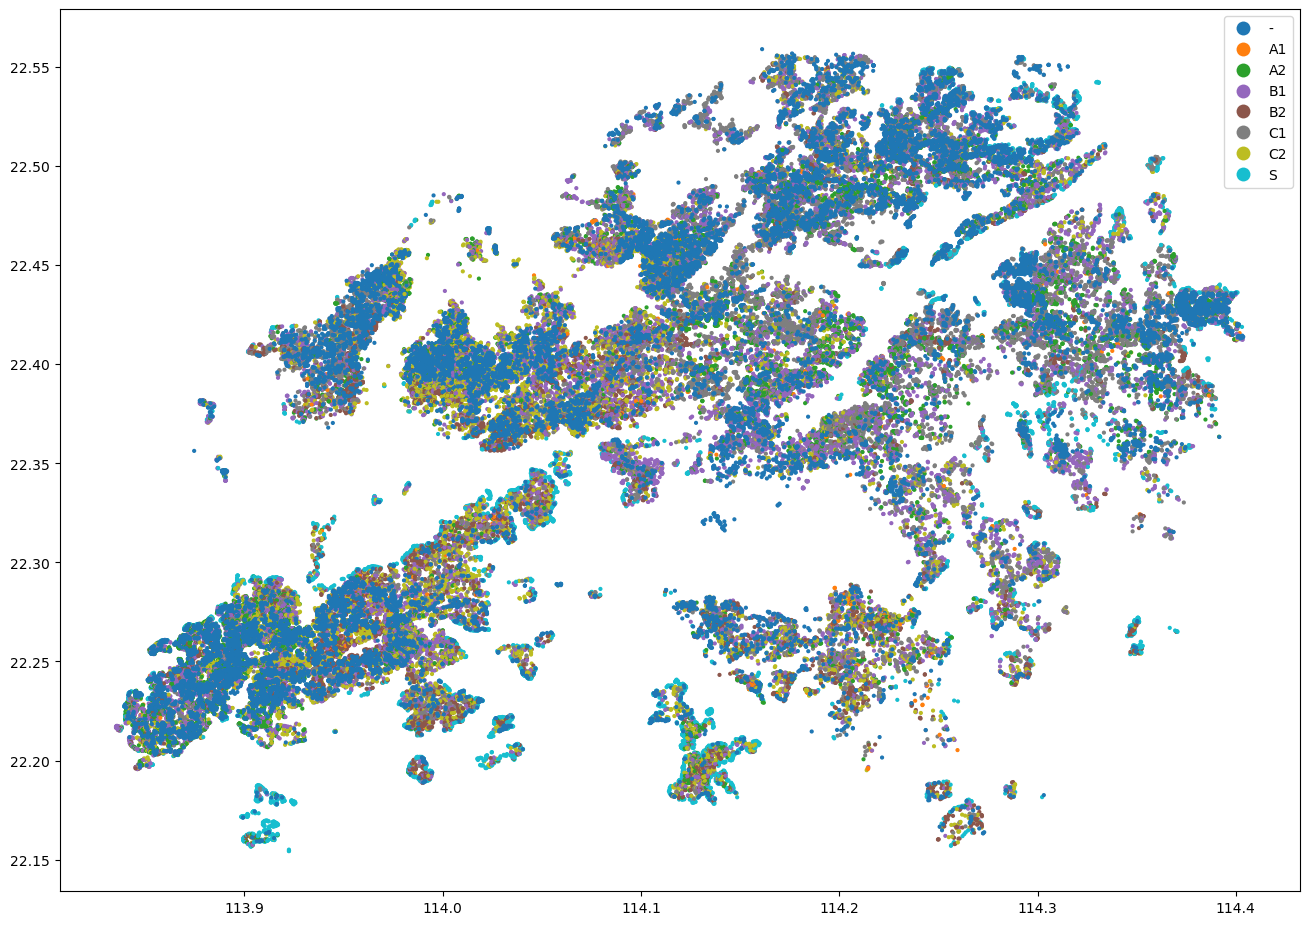

In [38]:
#density of landslides by class
ax = landslide_4326.plot('CLASS', figsize=[16,18],markersize = 4, legend = True)

plt.show()

- Landslides with a predominantly rounded scarp, which have 50% chance (B1) are the most prevalant
- It is also noticeable that most slides are not classified (-)

In [39]:
#landslide_4326 = pd.read_csv('landslide_loc.csv')
#landslide_4326.head()

In [40]:
#landslide_4326.drop('geometry', axis = 1, inplace = True)

In [41]:
#landslide_4326.to_csv('landslide_loc.csv', index = False)

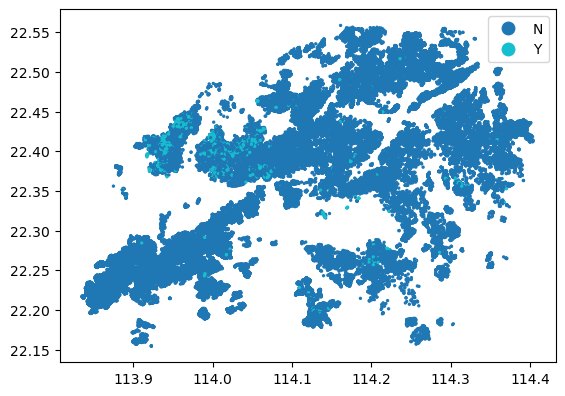

In [42]:
#density of landslides
landslide_4326.plot('GULLY',markersize = 2, legend = True)

plt.show()

________
## Exploratory Data Analysis
#### Questions to explore

- Where are the landslide areasin Hong Kong? See RESEARCH Q1 above
- What percentage of Hong Kong has landslides?
- Display the density of landslides in different areas in Hong Kong. Hint: Use a folium heatmap and data of years > 1998 and landslides that are not relict
- Display the number of landslides in Hong Kong. Hint: Use a folium marker cluster to plot points and data of years > 1998 and landslides that are not relict
- Which areas are high in population density and are prone to landslides?. Hint: Find the populations in hongkong from https://data.gov.hk datasets
- Is there a relationship between slope, head and tail elevation of landslide and slide type? Hint: Create a new column with prediction amount and do a correlation matrix.
- For future analysis: Proximity Analysis - How far are the areas with prevalent lanslide from hospital. i.e how far is the nearest hospital?

In [ ]:
landslide_4326.describe()

__Frequency of slide_types__

In [ ]:
landslide_4326.SLIDE_TYPE.hist(figsize=[8,8])

__Frequency of class types__
Class is categorical nominal and its frequencies is represented with a histogram

In [ ]:
landslide_4326.CLASS.hist(figsize=[8,8])

- There is a high frequency of B1 type - Scarp predominantly rounded (50% certain)
- Then followed by  unclassified landslides and then type C1 - Depression related to drainage line (10% certain)